In [1]:
pip install jupyter nbformat

INFO: pip is looking at multiple versions of notebook to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of notebook to determine which version is compatible with other requirements. This could take a while.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      ERROR: Could not find a version that satisfies the requirement puccinialin (from versions: none)
      ERROR: No matching distribution found for puccinialin
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× pip subprocess to install backend dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [11]:
df

,Alter,Männer,Frauen
0,0,378554,359226
1,1,418885,397301
2,2,411555,389257
3,3,415174,394185
4,4,422868,401676
...,...,...,...
96,96,8845,29894
97,97,5449,21455
98,98,3284,14327
99,99,2154,9331


In [ ]:
# ---- NEW: load population data for the pyramid (separate name to avoid clashing) ----
df_pyr = pd.read_excel("./Input/2022.xlsx")

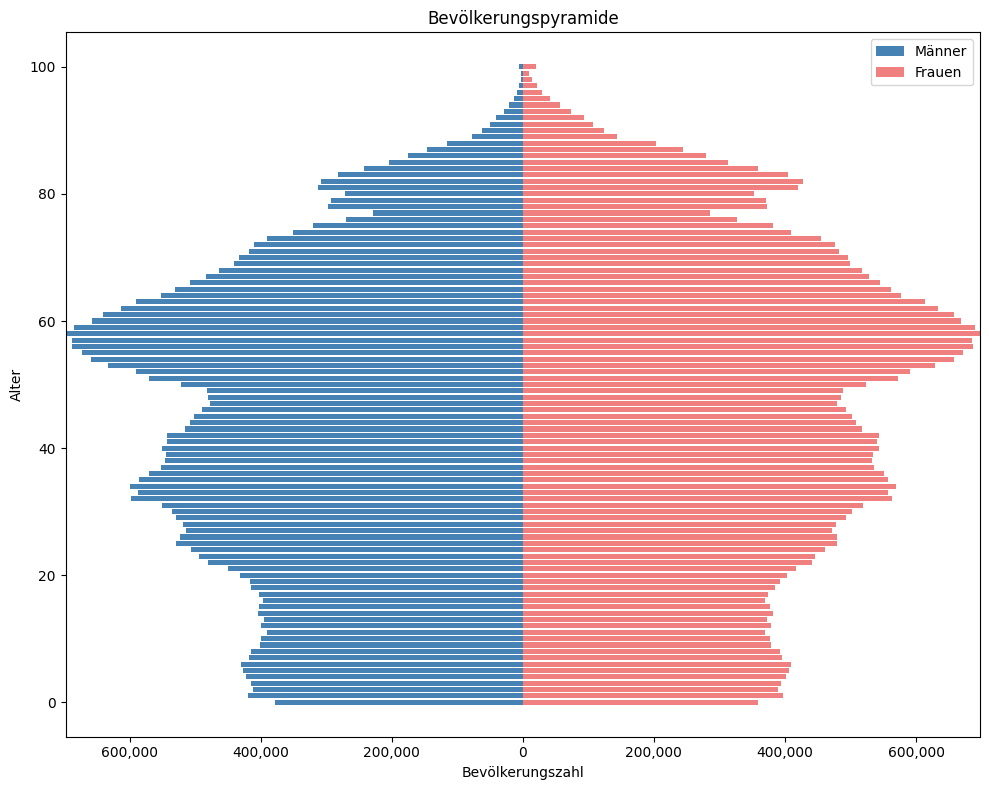

In [18]:
df= pd.read_excel('./Input/2022.xlsx')
df["Männer"] = -df["Männer"]  # Negative for left side

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(df["Alter"], df["Männer"], color="steelblue", label="Männer")
ax.barh(df["Alter"], df["Frauen"], color="lightcoral", label="Frauen")

ax.set_xlabel("Bevölkerungszahl")
ax.set_ylabel("Alter")
ax.set_title("Bevölkerungspyramide")
ax.legend()

max_val = max(df["Frauen"].max(), abs(df["Männer"].min()))
ax.set_xlim(-max_val, max_val)

# ✅ Show positive tick labels only
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{abs(int(x)):,}"))

plt.tight_layout()
plt.show()

In [3]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import numpy as np

# Initialize notebook mode
init_notebook_mode(connected=True)

women_bins = np.array([-600, -623, -653, -650, -670, -578, -541, -411, -322, -230])
men_bins = np.array([600, 623, 653, 650, 670, 578, 541, 360, 312, 170])

y = list(range(0, 100, 10))

layout = go.Layout(
    yaxis=go.layout.YAxis(title='Age'),
    xaxis=go.layout.XAxis(
        range=[-1200, 1200],
        tickvals=[-1000, -700, -300, 0, 300, 700, 1000],
        ticktext=['1000', '700', '300', '0', '300', '700', '1000'],
        title='Number'
    ),
    barmode='overlay',
    bargap=0.1
)

data = [
    go.Bar(
        y=y,
        x=men_bins,
        orientation='h',
        name='Men',
        hoverinfo='x',
        marker=dict(color='powderblue')
    ),
    go.Bar(
        y=y,
        x=women_bins,
        orientation='h',
        name='Women',
        text=-1 * women_bins.astype('int'),
        hoverinfo='text',
        marker=dict(color='seagreen')
    )
]

# Use iplot for Jupyter
iplot({'data': data, 'layout': layout})

In [4]:
women_bins = np.array([-600, -623, -653, -650, -670, -578, -541, -411, -322, -230])
men_bins = np.array([600, 623, 653, 650, 670, 578, 541, 360, 312, 170])
women_with_dogs_bins = np.array([-0, -3, -308, -281, -245, -231, -212, -132, -74, -76])
men_with_dogs_bins = np.array([0, 1, 300, 273, 256, 211, 201, 170, 145, 43])

y = list(range(0, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-1200, 1200],
                       tickvals=[-1000, -700, -300, 0, 300, 700, 1000],
                       ticktext=[1000, 700, 300, 0, 300, 700, 1000],
                       title='Number'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               ),
        go.Bar(y=y,
               x=men_with_dogs_bins,
               orientation='h',
               hoverinfo='x',
               showlegend=False,
               opacity=0.5,
               marker=dict(color='teal')
               ),
        go.Bar(y=y,
               x=women_with_dogs_bins,
               orientation='h',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               showlegend=False,
               opacity=0.5,
               marker=dict(color='darkgreen')
               )]

# py.iplot(dict(data=data, layout=layout), filename='EXAMPLES/stacked_bar_pyramid')
# Use iplot for Jupyter
iplot({'data': data, 'layout': layout})

In [5]:
layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(
                       tickvals=[-150, -100, -50, 0, 50, 100, 150],
                       ticktext=[150, 100, 50, 0, 50, 100, 150],
                       title='Number'))

data = [go.Histogram(
    y=np.random.exponential(50, 1000),
    orientation='h',
    name='Men',
    marker=dict(color='plum'),
    hoverinfo='skip'
),
    go.Histogram(
        y=np.random.exponential(55, 1000),
        orientation='h',
        name='Women',
        marker=dict(color='purple'),
        hoverinfo='skip',
        x=-1 * np.ones(1000),
        histfunc="sum"
    )
]

iplot({'data': data, 'layout': layout})